<h1 align ='center'>Calculating Galaxy Distance Using Spectra </h1>
<h5 align = 'center'> 
    Author: K M Shariat Ullah  <br>
    Student, Electrical and Electronic Engineering, <br>
    Shahjalal University of Science and Technology <br>
    E-mail: cast.shariat@gmail.com
</h5>


In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

646


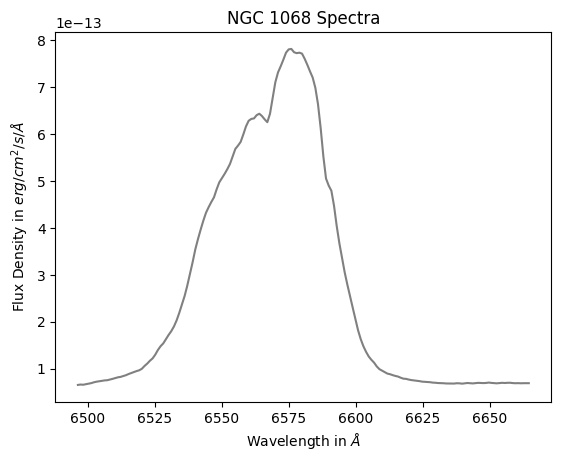

In [58]:
# load dataset
data = pd.read_csv('NGC_1068.csv')

# slicing to get the H alpha line
wave = data.wavelength[280:450]     
intensity = data.intensity[280:450]  
print(len(data))
plt.plot(wave, intensity, color='gray')
plt.title('NGC 1068 Spectra')
plt.xlabel('Wavelength in $\\AA$')
plt.ylabel('Flux Density in $erg/cm^2/s/\\AA$')
plt.show()

In [59]:
# finding the red shifted wavelenght at which H alpha line peaks

x = find_peaks(intensity, height=7e-13)
print(f"Red Shifted H Alpha Line at: {wave[280+x[0][1]]} Angstorm with Intensity {intensity[280+x[0][1]]}")

Red Shifted H Alpha Line at: 6578.97 Angstorm with Intensity 7.73e-13


In [60]:
# calculating red shift value

wave_obs = 6578.97              # angstorm
wave_src = 6562.8               # angstorm

z = (wave_obs-wave_src)/wave_src
print(f"Redshift value z: {z:0.6f}")

# -------------------------
#          constant
# -------------------------

c = 299792458 
H_0 = 72                        # km/s / Mpc
d_act = 13.48                   # Mpc

# calculating receding velocity
v = c * z                       # m/s
v = v / 1000                    # km/s
print(f"Veloocity of NGC 1068: {v:0.2f}")

# calculating distance
d_spectra = v / H_0
print(f"Distance of NGC 1068: {d_spectra:0.2f}")

# calculating error
error = (d_act - d_spectra)/d_act * 100

print(f"Error: {error:0.2f}%")

Redshift value z: 0.002464
Veloocity of NGC 1068: 738.65
Distance of NGC 1068: 10.26
Error: 23.89%


<h1 align ='center'>Calculating Galaxy Distance Using Density Parameter </h1>
<h5 align = 'center'> 
    Author: K M Shariat Ullah  <br>
    Student, Electrical and Electronic Engineering, <br>
    Shahjalal University of Science and Technology <br>
    E-mail: cast.shariat@gmail.com
</h5>


In [61]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from scipy.integrate import quad

In [62]:
# ---------------------
#      Constants
# ---------------------
c = 299792458                # m/s                     
H_0 = 72                     # km/s/Mpc
lambda_src = 6562.8          # Rest wavelength of H alpha line
lambda_obs = 6578.97         # Observed wavelength of H alpha line

# Updated matter density parameter (Planck 2018) 
omega_m = 0.3142  
omega_lambda = 0.6858 
omega_k = 0.001 

# Literature distance of NGC 1068
d_act = 13.48   
D_H = c / H_0

In [64]:
# red shift
z = (lambda_obs - lambda_src) / lambda_src
print(f"Redshift Value of NGC 1068: {z:.6f}")

                                
# Function E(z) from cosmology resource
def E(z):
    return np.sqrt(omega_m * (1 + z)**3 + omega_k * (1 + z)**2 + omega_lambda)

# Calculate comoving distance D_C
def comoving_distance(z):
    integral, _ = quad(lambda z_prime: 1 / E(z_prime), 0, z)
    return D_H * integral

# Compute the comoving distance for 3C 273
D_C = comoving_distance(z) / 1000
print(f"Comoving Distance of NGC_1068: {D_C:.2f} Mpc")

# error 
error_advanced = abs(D_C - d_act) / d_act * 100
print(f"Error is: {error_advanced:0.2f}%")

Redshift Value of NGC 1068: 0.002464
Comoving Distance of NGC_1068: 10.25 Mpc
Error is: 23.98%
